In [1]:
#Date: 07-01-2025
#SML - Practical 1: Linear Regression (if plot size is given predict the housing price)

#Libraries
import matplotlib.pyplot as plt #
import numpy as np #
import pandas as pd #
from sklearn import linear_model #
from sklearn.model_selection import train_test_split #
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler



In [2]:
#Load and Prepare Dataset 
df = pd.read_csv('D:/Users/Downloads/Housing.csv')

In [3]:
df.head() #

,rownames,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,1,42000,5850,3,1,2,yes,no,yes,no,no,1,no
1,2,38500,4000,2,1,1,yes,no,no,no,no,0,no
2,3,49500,3060,3,1,1,yes,no,no,no,no,0,no
3,4,60500,6650,3,1,2,yes,yes,no,no,no,0,no
4,5,61000,6360,2,1,1,yes,no,no,no,no,0,no


In [4]:
#Outputs top 5 records by default but can be changed 
df.tail()

,rownames,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
541,542,91500,4800,3,2,4,yes,yes,no,no,yes,0,no
542,543,94000,6000,3,2,4,yes,no,no,no,yes,0,no
543,544,103000,6000,3,2,4,yes,yes,no,no,yes,1,no
544,545,105000,6000,3,2,2,yes,yes,no,no,yes,1,no
545,546,105000,6000,3,1,2,yes,no,no,no,yes,1,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   rownames  546 non-null    int64 
 1   price     546 non-null    int64 
 2   lotsize   546 non-null    int64 
 3   bedrooms  546 non-null    int64 
 4   bathrms   546 non-null    int64 
 5   stories   546 non-null    int64 
 6   driveway  546 non-null    object
 7   recroom   546 non-null    object
 8   fullbase  546 non-null    object
 9   gashw     546 non-null    object
 10  airco     546 non-null    object
 11  garagepl  546 non-null    int64 
 12  prefarea  546 non-null    object
dtypes: int64(7), object(6)
memory usage: 55.6+ KB


In [6]:
df.describe() 

,rownames,price,lotsize,bedrooms,bathrms,stories,garagepl
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,273.500000,68121.597070,5150.265568,2.965201,1.285714,1.807692,0.692308
std,157.760895,26702.670926,2168.158725,0.737388,0.502158,0.868203,0.861307
min,1.000000,25000.000000,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,137.250000,49125.000000,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,273.500000,62000.000000,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,409.750000,82000.000000,6360.000000,3.000000,2.000000,2.000000,1.000000
max,546.000000,190000.000000,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
df.shape

(546, 13)

In [8]:

x = df['lotsize'] #Single predictor / independent variable
y = df['price'] #Target/Dependent variable

In [9]:

#RESHAPE THE DATA (objects -> 1d -> 2d)
x = x.values.reshape(len(x), 1)
y = y.values.reshape(len(y), 1)

In [10]:
x_scaler = StandardScaler()
y_scaler = StandardScaler()

x_scaled = x_scaler.fit_transform(x.values.reshape(-1, 1) if isinstance(x, pd.Series) else x)
y_scaled = y_scaler.fit_transform(y.values.reshape(-1, 1) if isinstance(y, pd.Series) else y)

print(x_scaled)
print(y_scaled)

[[ 3.23028055e-01]
 [-5.31012956e-01]
 [-9.64958118e-01]
 [ 6.92343087e-01]
 [ 5.58466388e-01]
 [-4.57149950e-01]
 [-5.86410211e-01]
 [-4.57149950e-01]
 [-1.61697924e-01]
 [ 1.61452729e-01]
 [ 9.46247171e-01]
 [-9.92656746e-01]
 [-1.59279367e+00]
 [-1.04805400e+00]
 [-7.15670472e-01]
 [-9.07252645e-01]
 [-8.54163609e-01]
 [ 2.29595918e-02]
 [-7.84917040e-01]
 [-5.37475969e-01]
 [-1.68622581e-01]
 [-2.95574623e-01]
 [-5.31012956e-01]
 [-5.61481446e-01]
 [-8.78349178e-02]
 [-9.92656746e-01]
 [-6.23341714e-01]
 [-8.78349178e-02]
 [-9.92656746e-01]
 [-3.00191061e-01]
 [-7.61834851e-01]
 [-7.61834851e-01]
 [-5.31012956e-01]
 [-3.00191061e-01]
 [ 5.58466388e-01]
 [-3.00191061e-01]
 [-5.16240355e-01]
 [ 9.11027809e-03]
 [ 1.15288350e-01]
 [-9.23410177e-01]
 [-6.48732122e-01]
 [-2.90958185e-01]
 [-2.35560930e-01]
 [ 1.58331560e+00]
 [-1.45430054e+00]
 [-1.38043753e+00]
 [-9.74190994e-01]
 [-9.51108805e-01]
 [-8.78349178e-02]
 [-8.31081419e-01]
 [ 6.91239708e-02]
 [-4.84848577e-01]
 [ 1.8538388

In [11]:
print(type(x))

<class 'numpy.ndarray'>


In [12]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.2)


In [13]:
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

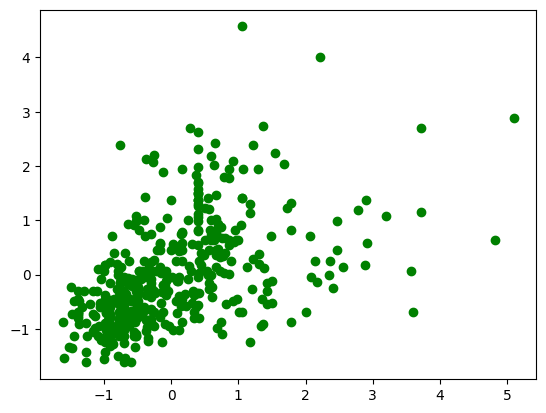

In [14]:
plt.scatter(x_train, y_train, color='green')

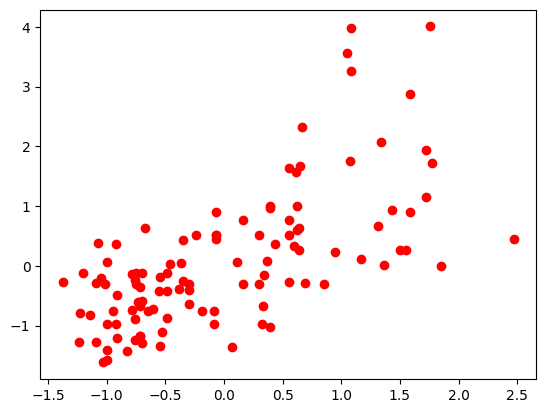

In [15]:
plt.scatter(x_test, y_test, color='red')

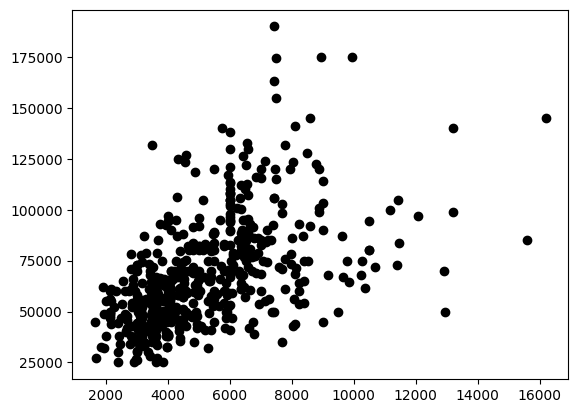

In [16]:
plt.scatter(x, y, color='black')

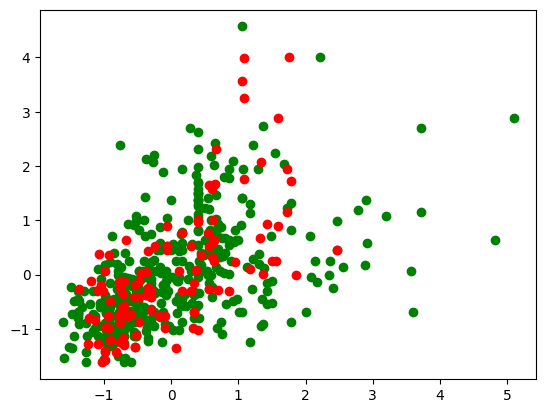

In [17]:
plt.scatter(x_train, y_train, color='green')
plt.scatter(x_test, y_test, color='red')

In [18]:
y_predict = reg.predict(x_test)


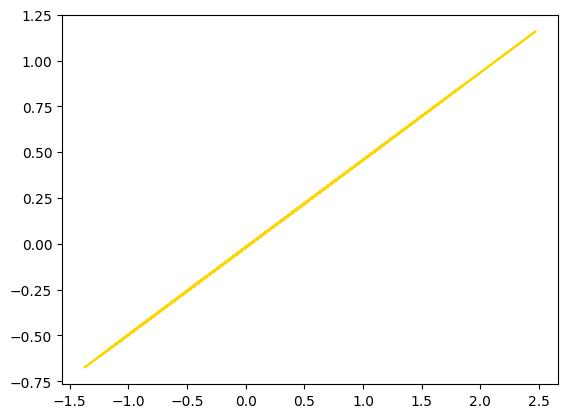

In [19]:
plt.plot(x_test, y_predict, color='gold')

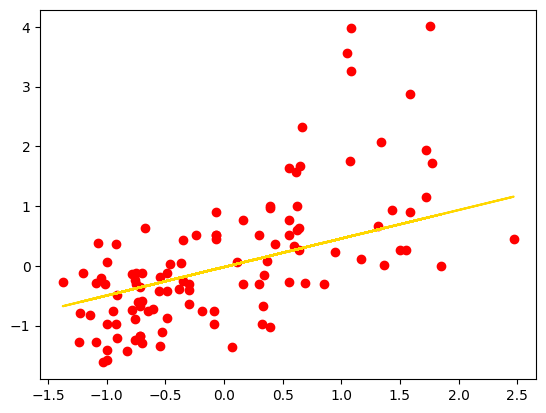

In [20]:
plt.scatter(x_test, y_test, color='red')
plt.plot(x_test, y_predict, color='gold')

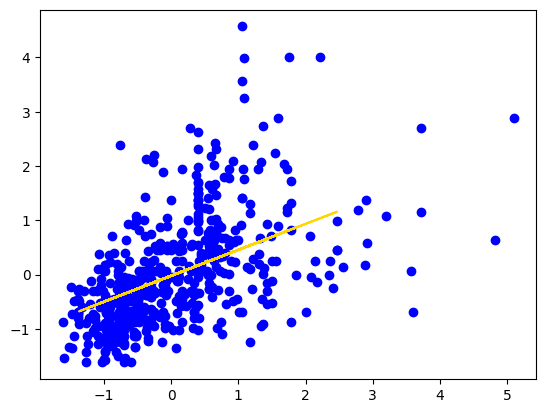

In [29]:
plt.scatter(x_scaled, y_scaled, color='blue')
plt.plot(x_test, y_predict, color='gold')

In [22]:
#Given: x = 175, Predict Y
#Eqn: y = 0.1x + 50
#Therefore Y = 67.5
#m is the coefficient parameter in terms of programming even though c is a coefficient as well
#c is the intercept
print(reg.coef_)
print(reg.intercept_)
#y = mx + c

[[0.47709235]]
[-0.01977082]


In [23]:
print(f'y = {reg.coef_}x + {reg.intercept_}')

y = [[0.47709235]]x + [-0.01977082]


Demonstrate multiple linear regression predict price but the input should be minimum three

In [24]:
x1 = [df['lotsize'], df['bedrooms'], df['bathrms']]
y = df['price']

In [25]:
#20th Jan Lab


In [26]:
mse = mean_squared_error(y_test, y_predict)
print(mse)

0.8440969787345306


In [27]:
rmse = np.sqrt(mse)
print(rmse)

0.9187475054303715


In [28]:
from sklearn.metrics import r2_score
rsqr = r2_score(y_test, y_predict)
print(rsqr)

0.3483299252126104
